# Exploratory Data Analysis

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df = pd.read_csv("Crop_recommendation.csv")

In [55]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2900 non-null   int64  
 1   P            2900 non-null   int64  
 2   K            2900 non-null   int64  
 3   temperature  2900 non-null   float64
 4   humidity     2900 non-null   float64
 5   ph           2900 non-null   float64
 6   rainfall     2900 non-null   float64
 7   label        2900 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 181.4+ KB


In [57]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,61.921724,50.800690,48.350690,25.136369,70.045086,6.452109,292.998736
std,41.308977,29.839867,45.685105,5.743696,19.328286,0.711982,411.938427
min,0.000000,5.000000,5.000000,7.015319,14.258040,3.504752,20.211267
25%,28.000000,30.000000,23.000000,22.076888,57.227053,6.067575,70.869481
50%,55.000000,47.000000,35.000000,25.518655,73.451614,6.436039,111.198011
75%,96.000000,63.000000,50.000000,28.669670,85.174548,6.836319,264.126903
max,200.000000,145.000000,205.000000,43.675493,99.981876,9.935091,2498.906530


In [58]:
print('Number of Crop types: ',df['label'].nunique())
labels_df = df['label']
crops_labels = pd.DataFrame(df['label'].value_counts())
crops_labels.sort_index(inplace=True)
crops_labels.reset_index(inplace=True)
crops_labels.rename(columns = {'index':'label','label':'count'}, inplace=True)
crops_labels.index.name='index'
crops_labels

Number of Crop types:  29


,count,count
index,,
0,apple,100
1,banana,100
2,blackgram,100
3,chickpea,100
4,coconut,100
5,coffee,100
6,cotton,100
7,grapes,100
8,groundnut,100


<Axes: xlabel='K', ylabel='Count'>

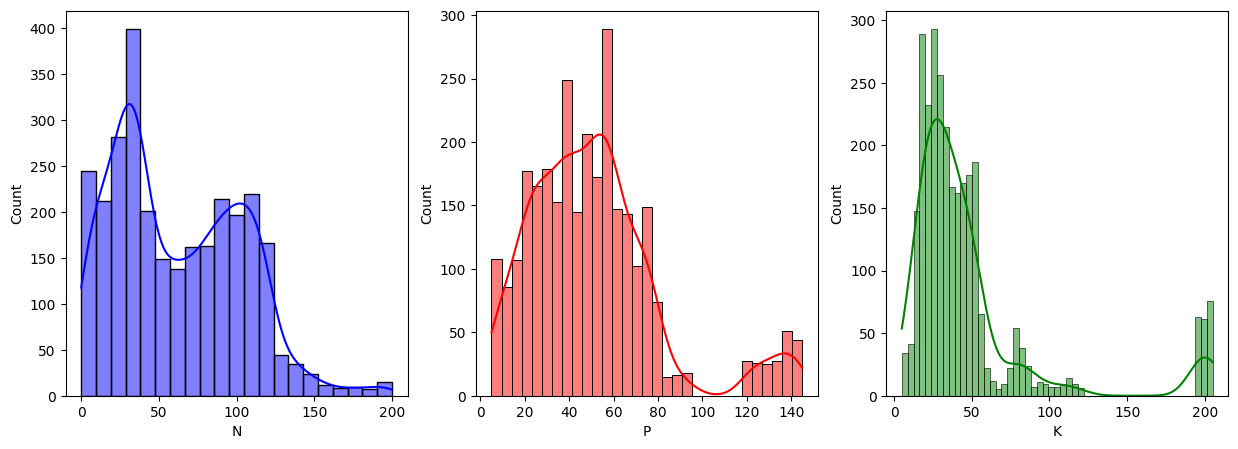

In [59]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
sns.histplot(df['N'],color = 'blue', kde = True)

plt.subplot(1,3,2)
sns.histplot(df['P'],color = 'red', kde = True)

plt.subplot(1,3,3)
sns.histplot(df['K'],color = 'green', kde = True)


<Axes: xlabel='rainfall', ylabel='Count'>

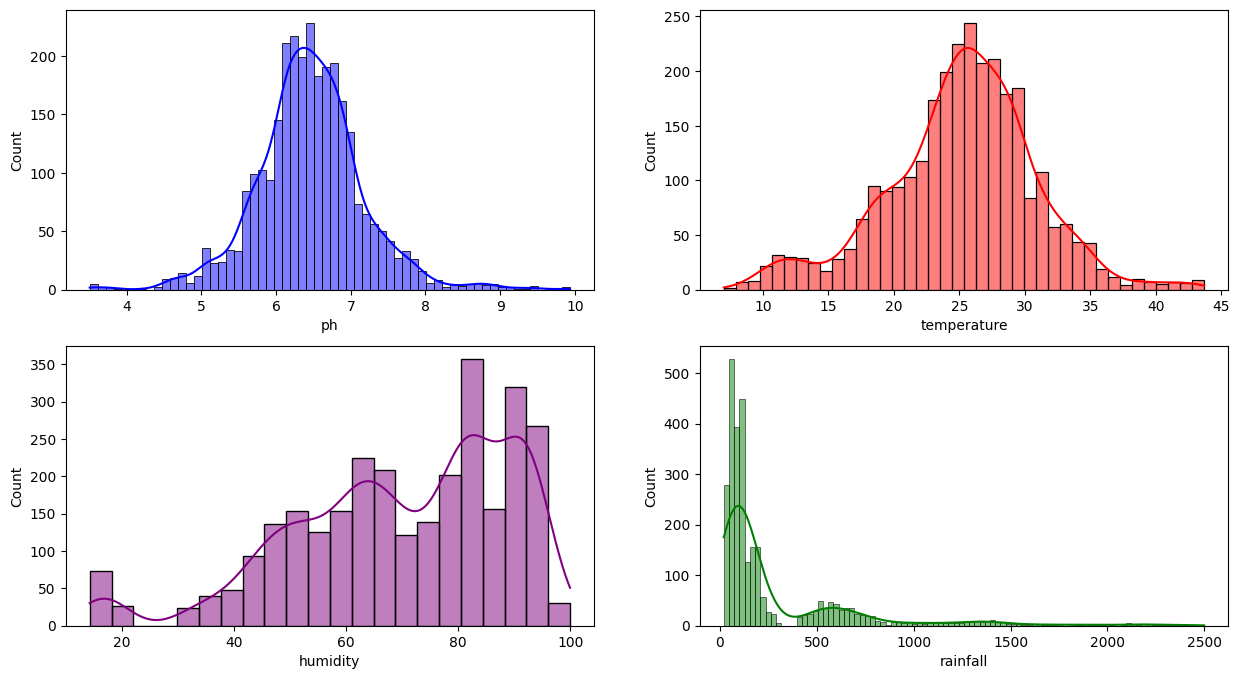

In [60]:
plt.figure(figsize = (15,8))

plt.subplot(2,2,1)
sns.histplot(df['ph'],color = 'blue', kde = True)

plt.subplot(2,2,2)
sns.histplot(df['temperature'],color = 'red', kde = True)

plt.subplot(2,2,3)
sns.histplot(df['humidity'],color = 'purple', kde = True)

plt.subplot(2,2,4)
sns.histplot(df['rainfall'],color = 'green', kde = True)



In [61]:
crop_desc = pd.pivot_table(df, index = 'label', aggfunc= 'mean')
crop_desc.reset_index(inplace = True)
crop_desc

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,groundnut,27.71,33.46,50.46,70.016003,6.534319,785.138739,21.154767
9,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


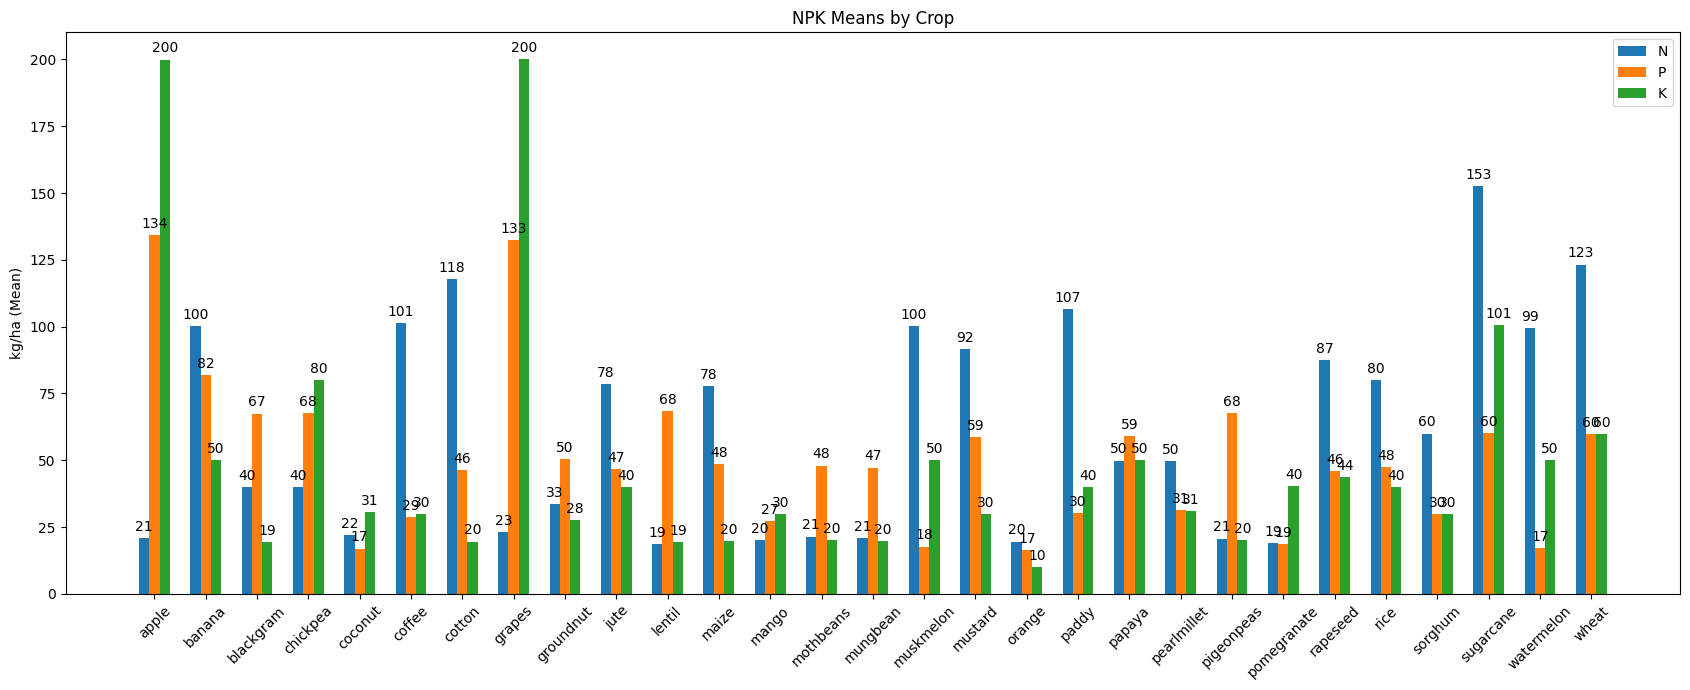

In [62]:
labels = crop_desc['label'].unique()

n_value = crop_desc['N']
p_value = crop_desc['P']
k_value = crop_desc['K']

x = np.arange(len(labels))  
width = 0.2


fig, ax = plt.subplots(1,1, figsize = (17,7))
n_bar = ax.bar(x - width, n_value, width, label='N')
p_bar = ax.bar(x, p_value, width, label='P')
k_bar = ax.bar(x + width, k_value, width, label='K')


ax.set_ylabel('kg/ha (Mean)')
ax.set_title('NPK Means by Crop')
ax.set_xticks(x, labels, rotation = 45)
ax.legend()

ax.bar_label(n_bar, padding=3,label_type='edge',fmt = '%.f')
ax.bar_label(p_bar, padding=3, label_type='edge',fmt = '%.f')
ax.bar_label(k_bar, padding=3, label_type='edge',fmt = '%.f')

fig.tight_layout()

plt.show()

/var/folders/yc/hnbxd2ls5wg6q4zy92dgpx_00000gp/T/ipykernel_62400/2564884117.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ph_boxplot.set_xticklabels(ax.get_xticklabels(),rotation=45)


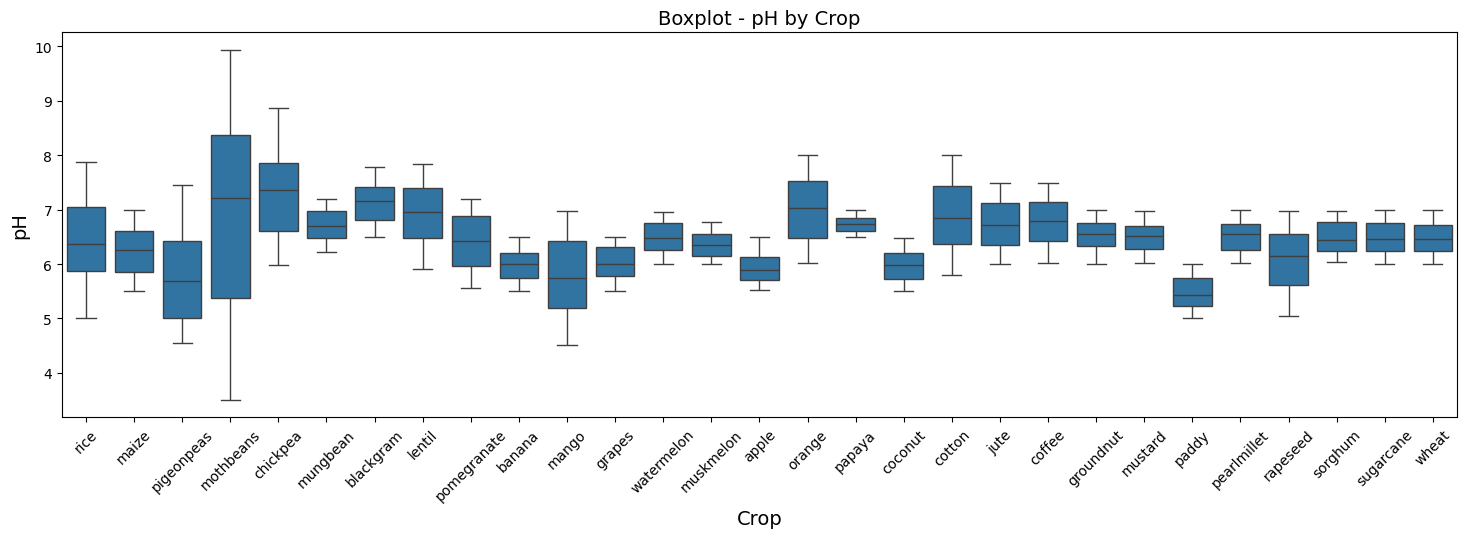

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(18, 5))
ph_boxplot = sns.boxplot(data = df, x = 'label', y = 'ph')
ph_boxplot.set_xlabel('Crop',fontsize = 14)
ph_boxplot.set_ylabel('pH', fontsize = 14)
ph_boxplot.axes.set_title('Boxplot - pH by Crop', fontsize=14)

ph_boxplot.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# Classification Models

In [64]:
X = df.drop('label', axis = 1)
y = df['label']

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =3)


param_dict = {
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12,14,16,18,20,22],
    'random_state':[2]
}
test_dec_tree = DecisionTreeClassifier(random_state = 2)
test_dec_tree.fit(X_train, y_train)


grid = GridSearchCV(test_dec_tree, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5] END criterion=gini, max_depth=2, random_state=2;, score=0.143 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, random_state=2;, score=0.143 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, random_state=2;, score=0.143 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, random_state=2;, score=0.246 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, random_state=2;, score=0.145 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, random_state=2;, score=0.419 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, random_state=2;, score=0.416 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, random_state=2;, score=0.143 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, random_state=2;, score=0.246 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, random_state=2;, score=0.352 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth

In [66]:
Dec_tree = DecisionTreeClassifier(max_depth = 12, criterion = 'gini', random_state = 2)

Dec_tree.fit(X_train, y_train)
dt_train_score = Dec_tree.score(X_train, y_train)
print(f'Decision Tree Train Accuracy is : {dt_train_score :.4f}')

dt_predicted_values = Dec_tree.predict(X_test)
dt_test_score = metrics.accuracy_score(y_test, dt_predicted_values)
print(f'Decision Tree Test Accuracy is : {dt_test_score :.4f}')
dt_report = classification_report(y_test, dt_predicted_values, digits = 4)
print(dt_report)

Decision Tree Train Accuracy is : 0.9892
Decision Tree Test Accuracy is : 0.9586
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     0.9706    1.0000    0.9851        33
   blackgram     0.9333    0.9655    0.9492        29
    chickpea     1.0000    1.0000    1.0000        32
     coconut     1.0000    1.0000    1.0000        30
      coffee     0.9231    1.0000    0.9600        24
      cotton     0.9630    1.0000    0.9811        26
      grapes     1.0000    1.0000    1.0000        29
   groundnut     1.0000    1.0000    1.0000        31
        jute     0.6944    1.0000    0.8197        25
      lentil     0.8947    1.0000    0.9444        17
       maize     0.8800    1.0000    0.9362        22
       mango     1.0000    1.0000    1.0000        37
   mothbeans     1.0000    0.8857    0.9394        35
    mungbean     0.9655    1.0000    0.9825        28
   muskmelon     1.0000    1.0000    1.0000        30


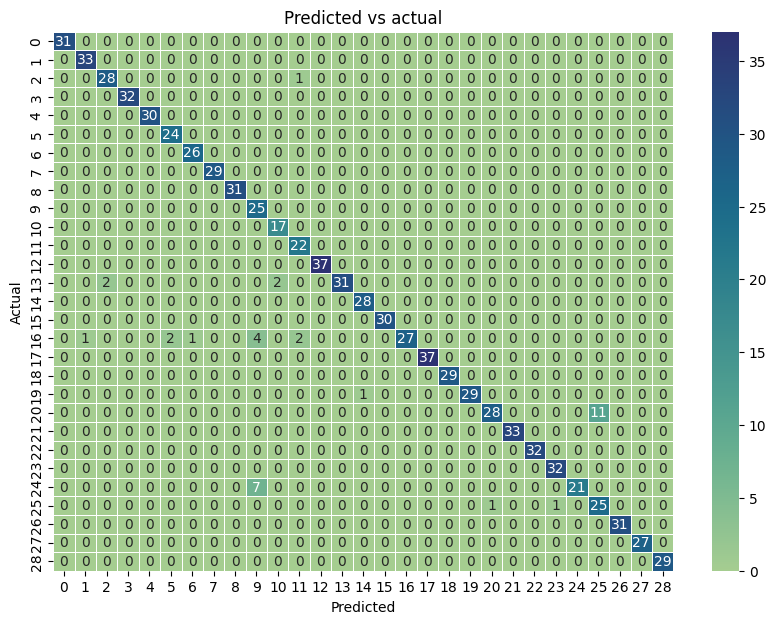

In [67]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test,dt_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
test_rdf_clf = RandomForestClassifier(random_state = 2)
test_rdf_clf.fit(X_train, y_train)

param_dict = {
    'n_estimators':[50,100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12,14,16,18,20,22],
    'random_state':[2]
}

grid = GridSearchCV(test_rdf_clf, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)



Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50, random_state=2;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50, random_state=2;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50, random_state=2;, score=0.741 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50, random_state=2;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50, random_state=2;, score=0.648 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=100, random_state=2;, score=0.736 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=100, random_state=2;, score=0.707 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=100, random_state=2;, score=0.722 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=100, random_state=2;, sc

In [69]:
rdf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 12, random_state = 2)

rdf_clf.fit(X_train, y_train)
rdf_train_score = rdf_clf.score(X_train,y_train)
print(f'Random Forest Train Accuracy is : {rdf_train_score :.4f}')

rdf_predicted_values = rdf_clf.predict(X_test)
rdf_test_score = metrics.accuracy_score(y_test, rdf_predicted_values)
print(f'Random Forest Test Accuracy is : {rdf_test_score :.4f}')
rdf_report = classification_report(y_test, rdf_predicted_values, digits = 4)
print(rdf_report)


Random Forest Train Accuracy is : 0.9980
Random Forest Test Accuracy is : 0.9805
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        33
   blackgram     1.0000    0.9655    0.9825        29
    chickpea     1.0000    1.0000    1.0000        32
     coconut     1.0000    1.0000    1.0000        30
      coffee     0.9600    1.0000    0.9796        24
      cotton     1.0000    1.0000    1.0000        26
      grapes     1.0000    1.0000    1.0000        29
   groundnut     1.0000    1.0000    1.0000        31
        jute     0.8929    1.0000    0.9434        25
      lentil     0.9444    1.0000    0.9714        17
       maize     0.8800    1.0000    0.9362        22
       mango     1.0000    1.0000    1.0000        37
   mothbeans     1.0000    0.9714    0.9855        35
    mungbean     1.0000    1.0000    1.0000        28
   muskmelon     1.0000    1.0000    1.0000        30


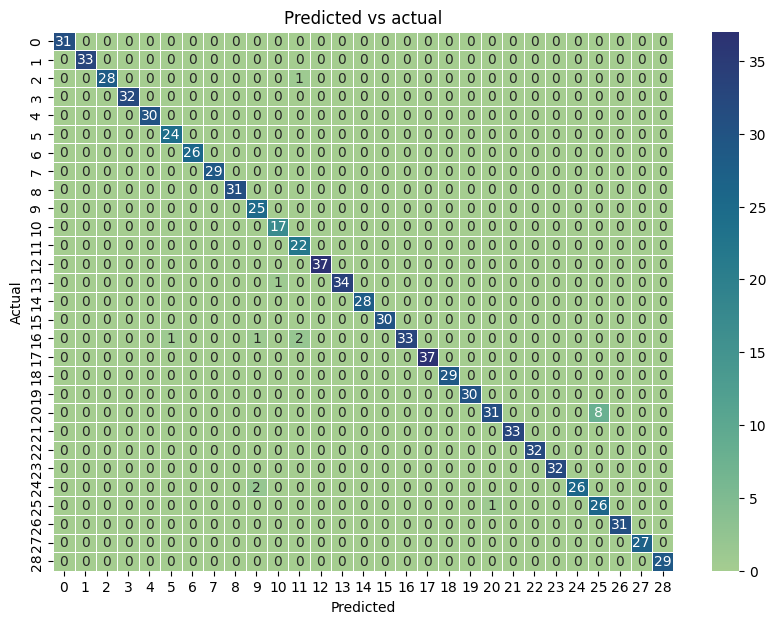

In [70]:
cm_rdf = confusion_matrix(y_test,rdf_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_rdf, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### K-Nearest Neighbors

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)



In [72]:
score_list = []
for i in range(4,20):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled, y_train)

    knn_train_score = knn.score(X_train_scaled,y_train)

    knn_predicted_values = knn.predict(X_test_scaled)
    knn_test_score = metrics.accuracy_score(y_test, knn_predicted_values)

    score_list.append((i, knn_train_score, knn_test_score))
    score_knn_df = pd.DataFrame(score_list, columns = ['k','Train Score', 'Test Score'])
score_knn_df


,k,Train Score,Test Score
0,4,0.947291,0.910345
1,5,0.952709,0.916092
2,6,0.947291,0.910345
3,7,0.949261,0.908046
4,8,0.945320,0.909195
5,9,0.945813,0.910345
6,10,0.943350,0.904598
7,11,0.940887,0.898851
8,12,0.936946,0.895402
9,13,0.940394,0.898851


In [73]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(X_train_scaled, y_train)

knn_train_score = knn.score(X_train_scaled,y_train)
print(f'K-Nearest Neighbors Train Accuracy is : {knn_train_score :.4f}')

knn_predicted_values = knn.predict(X_test_scaled)
knn_test_score = metrics.accuracy_score(y_test, knn_predicted_values)


print(f'K-Nearest Neighbors Test Accuracy is : {knn_test_score :.4f}')
knn_report = classification_report(y_test, knn_predicted_values, digits = 4)
print(knn_report)

K-Nearest Neighbors Train Accuracy is : 0.9458
K-Nearest Neighbors Test Accuracy is : 0.9103
              precision    recall  f1-score   support

       apple     0.9394    1.0000    0.9688        31
      banana     0.9167    1.0000    0.9565        33
   blackgram     0.8125    0.8966    0.8525        29
    chickpea     1.0000    1.0000    1.0000        32
     coconut     0.8571    1.0000    0.9231        30
      coffee     0.8571    1.0000    0.9231        24
      cotton     0.8966    1.0000    0.9455        26
      grapes     1.0000    0.9310    0.9643        29
   groundnut     1.0000    1.0000    1.0000        31
        jute     0.7576    1.0000    0.8621        25
      lentil     0.4643    0.7647    0.5778        17
       maize     0.7692    0.9091    0.8333        22
       mango     0.9487    1.0000    0.9737        37
   mothbeans     0.9259    0.7143    0.8065        35
    mungbean     0.9655    1.0000    0.9825        28
   muskmelon     0.9677    1.0000    0.983

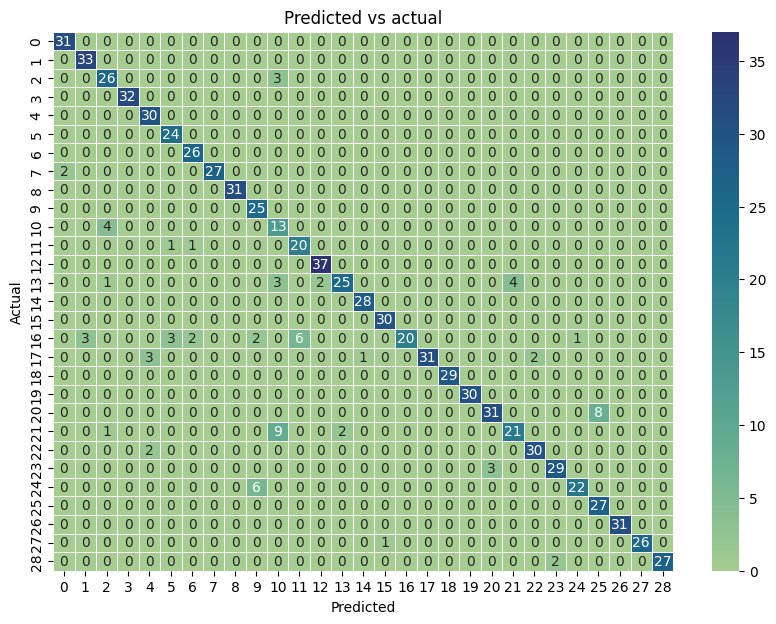

In [74]:
cm_knn = confusion_matrix(y_test,knn_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### SVM Classifier

In [75]:
from sklearn.svm import SVC

test_svm = SVC()
test_svm.fit(X_train_scaled,y_train)
test_svm.score(X_test_scaled,y_test)

param_dict = {
    'C':[0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,2,3,4,5,6],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(test_svm, param_dict, cv = 5, n_jobs = -1, verbose = 3)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.916 total time=   0.0s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.926 total time=   0.0s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.924 total time=   0.0s
[CV 5/5] END C=0.1, degree=1, gamma=1, kernel=poly;, score=0.919 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.916 total time=   0.1s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.914 total time=   0.1s
[CV 3/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.916 total time=   0.1s
[CV 4/5] END C=0.1, degree=1, gamma=1, kernel=rbf;, score=0.904 total time=   0.1s
[CV 1/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/5] END C=0.1, degree=1, gamma=1, kernel=linear;, score=0.916 total time=   0.0s
[CV 5/5] END

In [76]:
svm = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svm.fit(X_train_scaled, y_train)

svm_train_score = svm.score(X_train_scaled,y_train)
print(f'SVM Train Accuracy is : {svm_train_score :.4f}')

svm_predicted_values = svm.predict(X_test_scaled)
svm_test_score = metrics.accuracy_score(y_test, svm_predicted_values)
print(f'SVM Test Accuracy is : {svm_test_score :.4f}')
svm_report = classification_report(y_test, svm_predicted_values, digits = 4)
print(svm_report)

SVM Train Accuracy is : 0.9734
SVM Test Accuracy is : 0.9529
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     0.9429    1.0000    0.9706        33
   blackgram     0.8966    0.8966    0.8966        29
    chickpea     1.0000    1.0000    1.0000        32
     coconut     1.0000    1.0000    1.0000        30
      coffee     0.8889    1.0000    0.9412        24
      cotton     0.9630    1.0000    0.9811        26
      grapes     1.0000    1.0000    1.0000        29
   groundnut     1.0000    1.0000    1.0000        31
        jute     0.7812    1.0000    0.8772        25
      lentil     0.6364    0.8235    0.7179        17
       maize     0.8462    1.0000    0.9167        22
       mango     1.0000    0.9730    0.9863        37
   mothbeans     0.9429    0.9429    0.9429        35
    mungbean     1.0000    1.0000    1.0000        28
   muskmelon     1.0000    1.0000    1.0000        30
     mustard     1.0

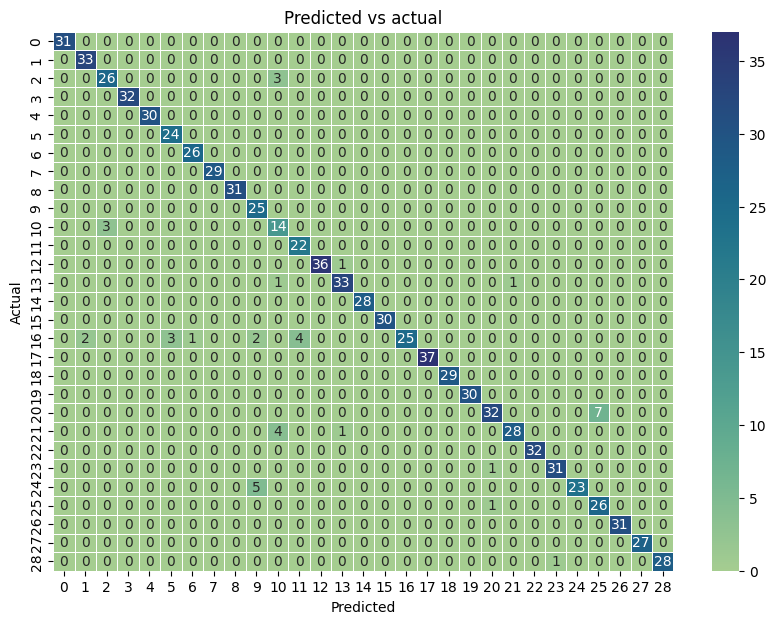

In [77]:
cm_svm = confusion_matrix(y_test,svm_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Naive-Bayes Classifier

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_train_score = gnb.score(X_train,y_train)
print(f'GNB Train Accuracy is : {gnb_train_score :.4f}')

gnb_predicted_values = gnb.predict(X_test)
gnb_test_score = metrics.accuracy_score(y_test, gnb_predicted_values)
print(f'GNB Test Accuracy is : {gnb_test_score :.4f}')
gnb_report = classification_report(y_test, gnb_predicted_values, digits = 4)
print(gnb_report)

GNB Train Accuracy is : 0.9911
GNB Test Accuracy is : 0.9828
              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        31
      banana     1.0000    1.0000    1.0000        33
   blackgram     1.0000    1.0000    1.0000        29
    chickpea     1.0000    1.0000    1.0000        32
     coconut     1.0000    1.0000    1.0000        30
      coffee     0.9231    1.0000    0.9600        24
      cotton     1.0000    1.0000    1.0000        26
      grapes     1.0000    1.0000    1.0000        29
   groundnut     1.0000    1.0000    1.0000        31
        jute     0.8929    1.0000    0.9434        25
      lentil     0.9444    1.0000    0.9714        17
       maize     0.9167    1.0000    0.9565        22
       mango     1.0000    1.0000    1.0000        37
   mothbeans     1.0000    0.9714    0.9855        35
    mungbean     1.0000    1.0000    1.0000        28
   muskmelon     1.0000    1.0000    1.0000        30
     mustard     1.0

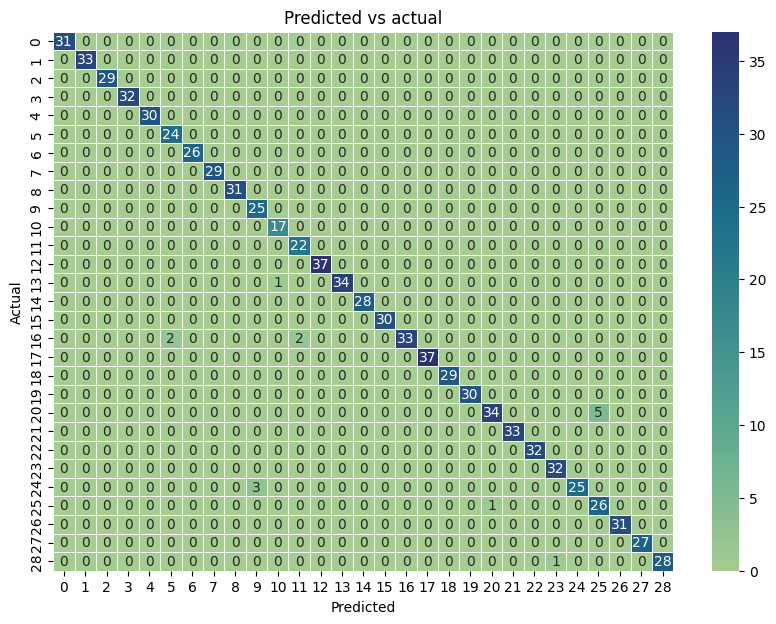

In [79]:
cm_gnb = confusion_matrix(y_test,gnb_predicted_values)

f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm_gnb, annot=True, linewidth=0.5, fmt=".0f",  cmap='crest', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Exporting Random Forest Model

In [80]:

from joblib import Parallel, delayed
import joblib

In [81]:
final_rdf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth = 12, random_state = 2)
final_rdf_clf.fit(X,y)

joblib.dump(final_rdf_clf, 'crop_rdf_clf.pkl')


['final_rdf_clf.pkl']